# Project: TMDB MOVIES DATASET

<br> TMDB dataset has more than 10000 movies has been collected from the movie database (TMDB), includin features like movie title, budget, revenue, cast, director, runtime, genre ...etc,
<br> in this project, we will analyz this dataset to get some useful insights, but first we need to clean the data like removing irrelative data to our analysis, dealing with missing data and correcting the bad values like zero budget or revenue or runtime.. etc 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
%matplotlib inline

In [2]:
# importing our csv file to make a dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### Next, we need to answer the next questions:
<br> Q1: how the number of produced movies changes over the years?
<br> Q2: Top 10 directors have the most revenue for thier films?
<br> Q3: what is the top 10 movies in revenue?
<br> Q4: what is the most produced genres ?
<br> Q5: does popularity  affect the revenue?
<br> Q6: does runtime  affect the revenue?
<br> Q7: does vote count  affect the revenue?
<br> Q8: does vote average affect the revenue?

<a id='wrangling'></a>
# Data Wrangling

### * General Properties

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
print('duplicated values count:', df.duplicated().sum())


duplicated values count: 1


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


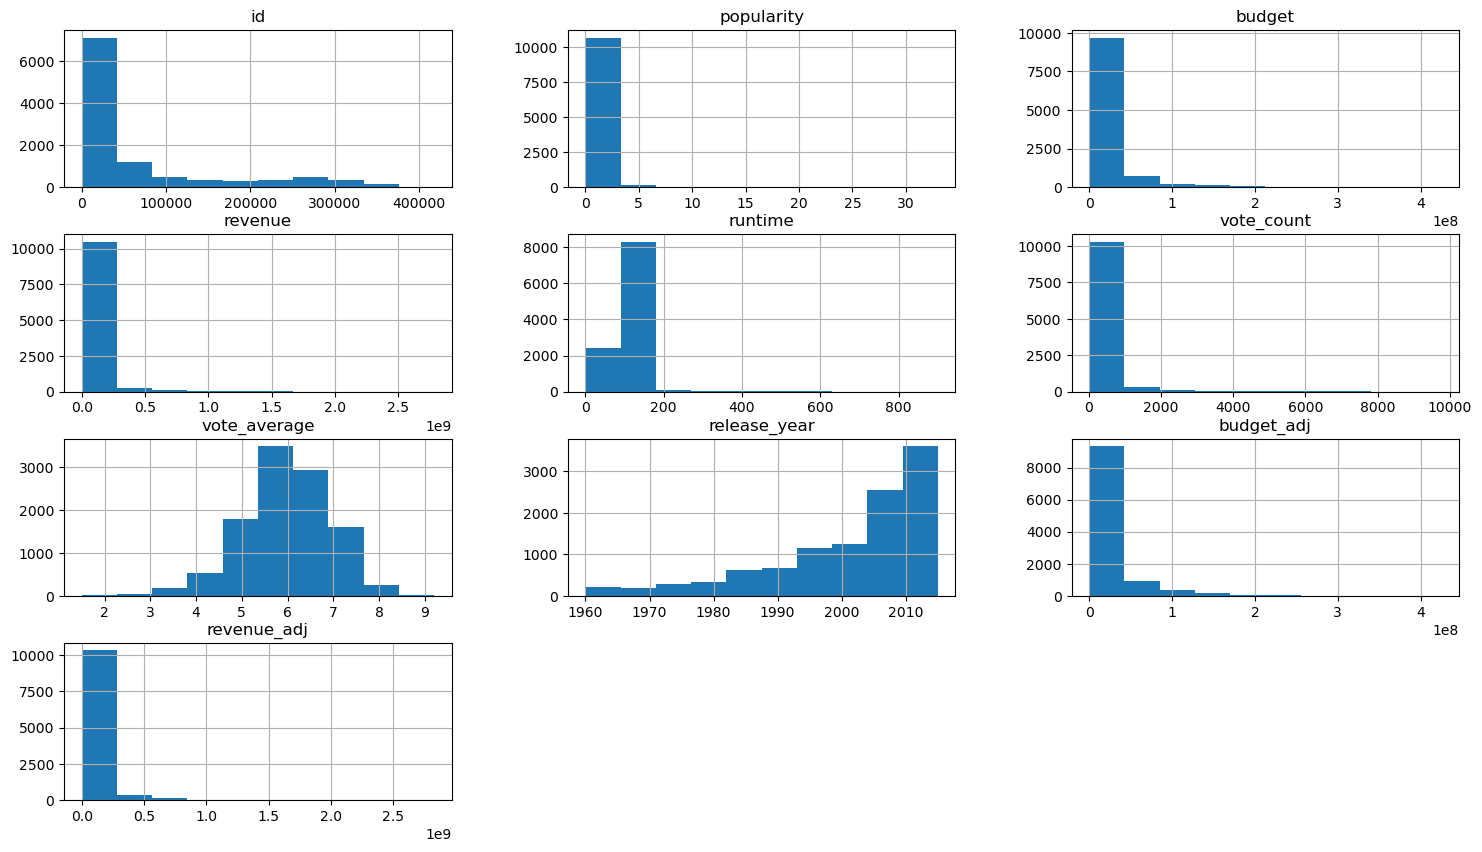

In [6]:

df.hist(figsize=(18, 10));


from describe function we can see there is movies has ZERO VALUES for budget, revenue And runtime, lets see how many rows has zeros

In [7]:

print('zero values count in budget column is: ', (df['budget'] == 0).sum())
print('zero values count in revenue column is: ', (df['revenue'] == 0).sum())
print('zero values count in runtime column is: ', (df['runtime'] == 0).sum())


zero values count in budget column is:  5696
zero values count in revenue column is:  6016
zero values count in runtime column is:  31


### * Data Cleaning
<br>* first we will drop the irrelated columns, and duplicated raws
<br>* then will deal with the missing values in genres and director columns using tmdb official api to get the actual values
<br>* also we will use the api to replace zeros in the budget, revenue and runtime columns. 
<br>



In [8]:
# dropping irrelated columns
df.drop(
    columns=[
        "homepage",
        "release_date",
        "tagline",
        "production_companies",
        "keywords",
        "overview",
        "imdb_id",
        "budget_adj",
        "revenue_adj",
        "cast",
    ],
    inplace=True,
)

In [9]:
# converting all string columns to lower case

df.director, df.original_title, df.genres = (
    df.director.str.lower(),
    df.original_title.str.lower(),
    df.genres.str.lower(),
)

In [10]:
# we have only 1 duplicated raw, so can drop it
df.drop_duplicates(inplace=True)
# check again for duplicates
df.duplicated().sum()

0

In [11]:
# lets check for null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

from above we can see there is null values in genres and director columns

Next, we will deal with the features with missing values in genres and director
<br>I registerd in tmdb official api read its docs,  got an api key to use it in my requests


In [12]:
# in this cell will deal with the missing genres values

# here is the api key that i got from tmdb api
api_key = "569f4c28a6676fc8b0c55407a23562a3"
# making a dataframe of the missing genres.
nan_genres = df.query('genres.isnull()')

# here we define a function to get the missing genre


def get_genre(movie_id):
    """
    this function takes the movie id as an argument, 
    make the requests to tmdb api,
    then return the genres
    """
    genres = []
    resp = requests.get(
        "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US&append_to_response=credits".format(movie_id, api_key))
    resp = json.loads(resp.content)
    try:
        # Get genres
        for genre in resp["genres"]:
            genres.append(str(genre["name"]).strip())
        genres = "|".join(genres)
    except:
        genres = 'other'
    return genres


# here we use the get_genre function to update the null values
for tmdb_id in nan_genres.id:
    df.loc[df.id == tmdb_id, "genres"] = get_genre(tmdb_id)


In [13]:

# making a dataframe of the missing genres.
nan_director = df.query('director.isnull()')

# defining a function to grab the missing directors.


def get_director(movie_id):
    """
    this function takes the movie id as an argument, 
    make the requests to tmdb api,
    then return the director
    """
    director = ""
    resp = requests.get(
        "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US&append_to_response=credits".format(movie_id, api_key))
    resp = json.loads(resp.content)
    try:
        # Get director name
        for p in resp["credits"]["crew"]:
            if p["job"] == "Director":
                director = p["name"].strip()
    except:
        director = 'other'
    return director


# here we use the get_director function to update the null values
for tmdb_id in nan_director.id:
    df.loc[df.id == tmdb_id, "director"] = get_director(tmdb_id)

In [14]:
# lets check again if thers is still null values
df[['director', 'genres']].isnull().sum()


director    0
genres      0
dtype: int64

next we will deal with zero values in the runtime, budget and revenue columns

In [15]:
# making a dataframe of the raws of zero runtime values.
zero_runtime_df = df.query('runtime == 0')


def get_runtime(movie_id):
    """
    this function takes the movie id as an argument, 
    make the requests to tmdb api,
    then return the runtime
    """
    resp = requests.get(
        "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(movie_id, api_key))
    resp = json.loads(resp.content)
    
    try:
        runtime = resp['runtime']
    except:
        runtime = 0
    return runtime


# here we use the get_runtime function to update the zero values
runtime_count = 0  # this is counter of how many values has been updated.
for tmdb_id in zero_runtime_df.id:
    runtime = get_runtime(tmdb_id)
    if runtime != 0:
        df.loc[df.id == tmdb_id, 'runtime'] = runtime
        runtime_count += 1
print('There are {} runtime values has been updated'.format(runtime_count))


There are 28 runtime values has been updated


In [16]:
# making a dataframe of the raws of zero budget values.
zero_budget_df = df.query('budget == 0')

def get_budget(movie_id):
    """
    this function takes the movie id as an argument, 
    make the requests to tmdb api,
    then return the budget
    """
    resp = requests.get(
        "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(movie_id, api_key))
    resp = json.loads(resp.content)
    
    try:
        budget = resp['budget']
    except:
        budget = 0
    return budget


# here we use the get_budget function to update the zero values
budget_count = 0  # this is counter of how many values has been updated.
for tmdb_id in zero_budget_df.id:
    budget = get_budget(tmdb_id)
    if budget != 0:
        df.loc[df.id == tmdb_id, 'budget'] = budget
        budget_count += 1
print('There are {} budget values has been updated'.format(budget_count))


There are 1017 budget values has been updated


In [17]:
# making a dataframe of the raws of zero revenue values.
zero_revenue_df = df.query('revenue == 0')

def get_revenue(movie_id):
    """
    this function takes the movie id as an argument, 
    make the requests to tmdb api,
    then return the revenue
    """
    resp = requests.get(
        "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(movie_id, api_key))
    resp = json.loads(resp.content)
    
    try:
        revenue = resp['revenue']
    except:
        revenue = 0
    return revenue

# here we use the get_revenue function to update the zero values
revenue_count = 0  # this is counter of how many values has been updated.
for tmdb_id in zero_revenue_df.id:
    revenue = get_revenue(tmdb_id)
    if revenue != 0:
        df.loc[df.id == tmdb_id, 'revenue'] = revenue
        revenue_count += 1
print('There are {} revenue values has been updated'.format(revenue_count))


There are 1266 revenue values has been updated


now check how many zeros again


In [18]:
print('zero values count in budget column was [5696] and now is: ', (df['budget'] == 0).sum())
print('zero values count in revenue column was [6016] and now is: ', (df['revenue'] == 0).sum())
print('zero values count in runtime column was [31] and now is: ', (df['runtime'] == 0).sum())

zero values count in budget column was [5696] and now is:  4679
zero values count in revenue column was [6016] and now is:  4750
zero values count in runtime column was [31] and now is:  3


<br> > there is still featurs with zero valus.
<br> > regarding runtime there is only still 3 movies with 0 runtime, we can get them manually using online search, i used (https://en.wikipedia.org/)
<br> > regarding budget and revenue, we will replace zeros with the median value

In [19]:
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
616,325843,0.026797,0,0,the outfield,michael goldfine,0,drama|comedy,20,6.6,2015
2370,127717,0.081892,0,0,freshman father,michael scott,0,Drama|TV Movie,12,5.8,2010
5992,173847,0.096455,0,0,amiche da morire,giorgia farina,0,romance|crime|comedy,30,5.5,2013


In [20]:
# after online search, we will set the runtime values we got.
#
df.loc[df.id == 325843, 'runtime'] = 90
df.loc[df.id == 127717, 'runtime'] = 87
df.loc[df.id == 173847, 'runtime'] = 103

# check for 0 runtime again
df[df['runtime']==0].runtime.sum()


0

In [21]:
# replacing the 0 budget and 0 revenue with the median value
df.budget.replace(to_replace=0, value=df.budget.median(), inplace=True)
df.revenue.replace(to_replace=0, value=df.revenue.median(), inplace=True)


In [22]:

print('zero values count in budget column was [5696] and now is: ', (df['budget'] == 0).sum())
print('zero values count in revenue column was [6016] and now is: ', (df['revenue'] == 0).sum())
print('zero values count in runtime column was [31] and now is: ', (df['runtime'] == 0).sum())

zero values count in budget column was [5696] and now is:  0
zero values count in revenue column was [6016] and now is:  0
zero values count in runtime column was [31] and now is:  0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   director        10865 non-null  object 
 6   runtime         10865 non-null  int64  
 7   genres          10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1018.6+ KB


In [36]:
# saving the cleaned data into new csv file
df.to_csv('tmdb-cleaned.csv',index=False)

In [179]:
cleaned_df = pd.read_csv('tmdb-cleaned.csv')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   director        10865 non-null  object 
 6   runtime         10865 non-null  int64  
 7   genres          10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 933.8+ KB


after reading the cleaned df i found there is  5  missing directors, i got them using online search and will update them manually

In [181]:
cleaned_df[cleaned_df.director.isnull()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year


i used (https://en.wikipedia.org/) to get the missing directors and assigned them manually as follows

In [ ]:
cleaned_df.loc[cleaned_df.id == 259910,'director'] = 'brad baruh'
cleaned_df.loc[cleaned_df.id == 253675,'director'] = 'susannah ward'
cleaned_df.loc[cleaned_df.id == 301235,'director'] = 'phil churchward'
cleaned_df.loc[cleaned_df.id == 17171,'director'] = "andrew dominik"
cleaned_df.loc[cleaned_df.id == 46188,'director'] = 'david cherkasskiy'

In [ ]:
# saving to csv file again
df.to_csv('tmdb-cleaned.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Lets see how the number of produced movies changes over the years?


In [3]:
cleaned_df = pd.read_csv('tmdb-cleaned.csv')

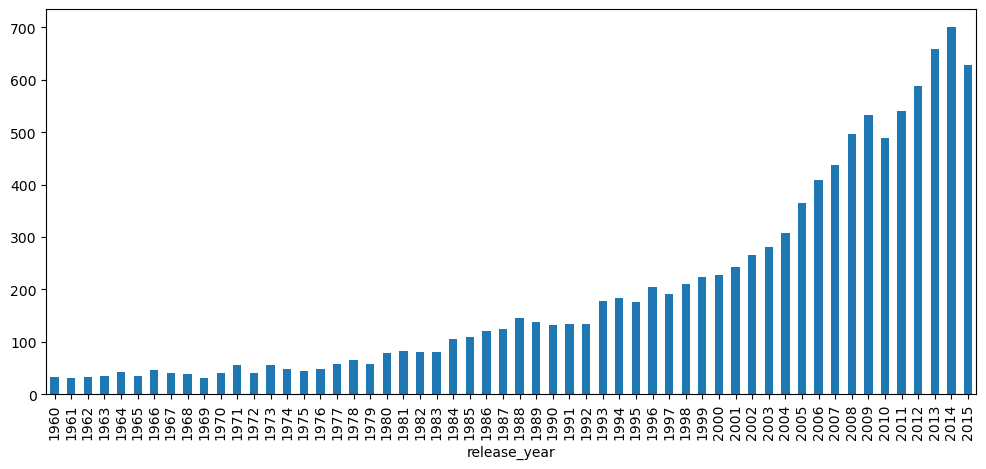

In [86]:
cleaned_df.groupby('release_year')['original_title'].count().plot(kind='bar', figsize=(12,5));

#### As we see from the above chart, No. of produced movies starts increasing dramatically in 1993, and keep increasing over the years to reach the top in 2014

### Q2: Lets see Top 10 directors have the most revenue for thier films?

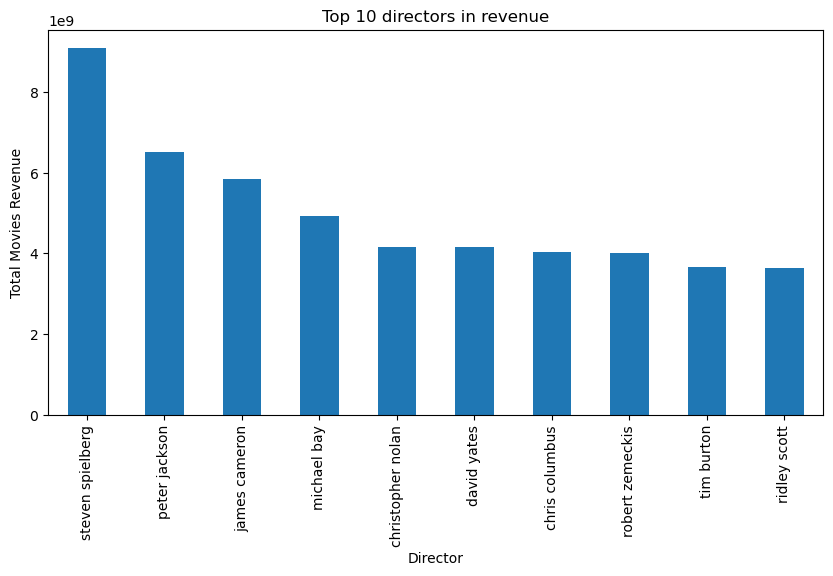

In [163]:
cleaned_df.groupby('director')['revenue'].sum().nlargest(10).plot(kind='bar', x='director', y='revenue',xlabel='Director', ylabel='Total Movies Revenue', figsize=(10,5), title='Top 10 directors in revenue');

from the above chart, we see that the top 10 directors whos thire movies have the highest revenue: 
<br>1- steven spielberg
<br>2-peter jackson
<br>3-james cameron
<br>4-micheal bay
<br>5-christopher nolan
<br>6-david yates
<br>7-chris columbus
<br>8-robert zemeckis
<br>9-tim burton
<br>10-ridley scott 

### Q3: what is the top 10 movies in revenue?

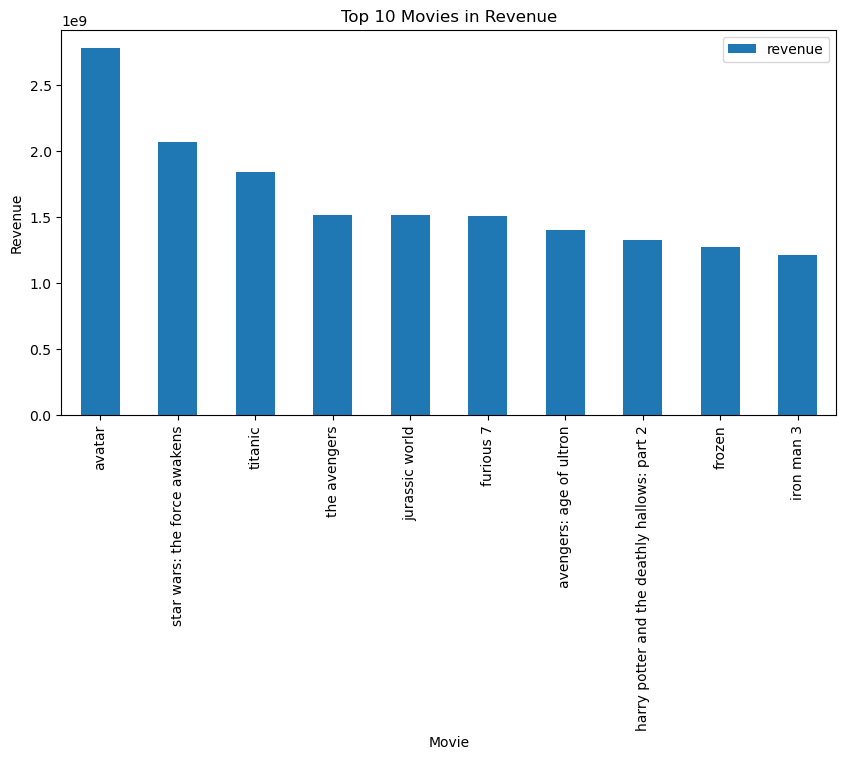

In [164]:
cleaned_df.nlargest(10, 'revenue')[['original_title', 'revenue']].plot(kind='bar', x='original_title', y= 'revenue',xlabel= 'Movie', ylabel='Revenue', title= 'Top 10 Movies in Revenue', figsize=(10,5));

the chart shows that the highest movie in revenue is:
<br>1-avatar
<br>2-star wars: the force awakness
<br>3-titanic
<br>4-the avengers
<br>5-jurassic world
<br>6-furious 7
<br>7-avengers: age of ultron
<br>8-harry potter and the deadthy hallows: part2
<br>9-frozen
<br>10-iron man 3

### Q4: what is the most produced genres ?

In [119]:
genres_df= cleaned_df.genres.str.split('|', expand=True)
genres_df = pd.DataFrame(genres_df.stack())
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj =genres_df.genres_adj.str.lower()

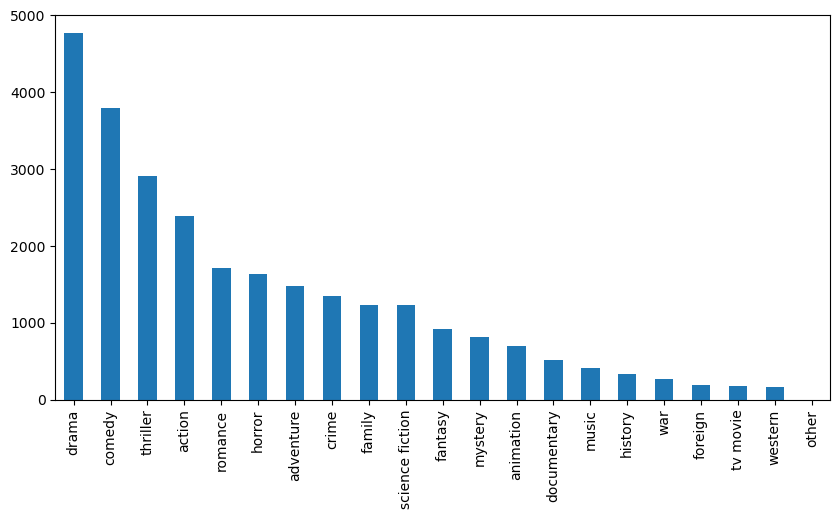

In [121]:
genres_df.genres_adj.value_counts().plot(kind='bar', figsize=(10,5));

as we see the most produced genre is drama, then comedy, then thriller and action

### Q5: does popularity  affect the revenue?

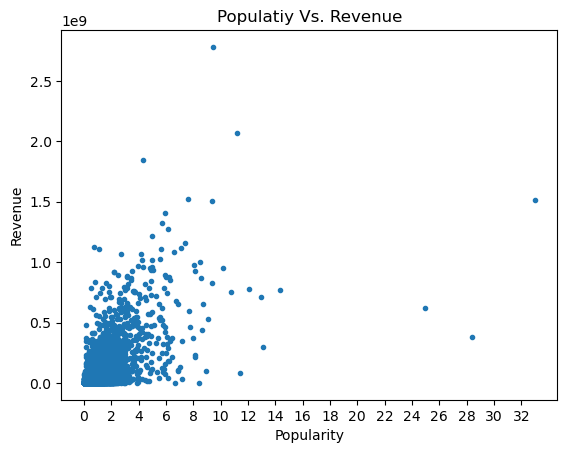

In [171]:
plt.scatter(x=cleaned_df.popularity, y=cleaned_df.revenue, marker='.', linewidths=1, );
plt.xticks(range(0,1+int(cleaned_df.popularity.max()),2 ));
plt.xlabel('Popularity');
plt.ylabel('Revenue');
plt.title('Populatiy Vs. Revenue');

there is a positive correlation between popularity and revenue

### Q6: does runtime  affect the revenue?

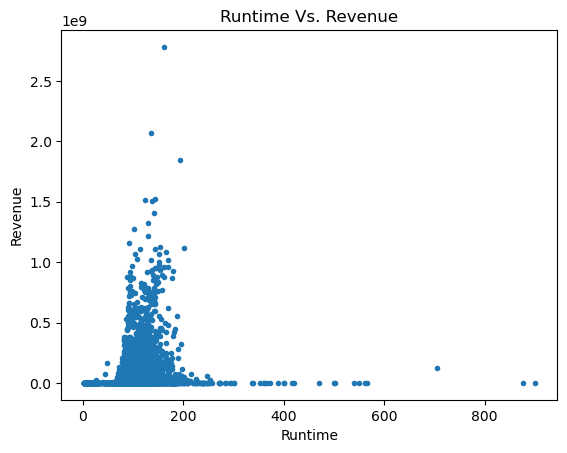

In [173]:
plt.scatter(x=cleaned_df.runtime, y=cleaned_df.revenue, marker='.', linewidths=1, );
# plt.xticks(range(0,1+int(cleaned_df.popularity.max()),2 ));
plt.xlabel('Runtime');
plt.ylabel('Revenue');
plt.title('Runtime Vs. Revenue');

there is a weak positive correlation between runtime and revenue

### Q7: does vote count  affect the revenue?

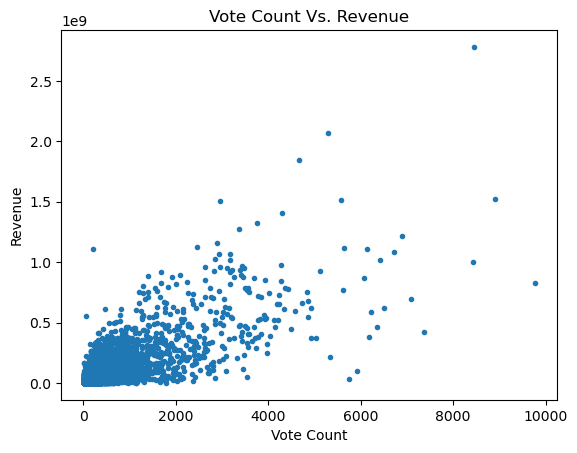

In [175]:
plt.scatter(x=cleaned_df.vote_count, y=cleaned_df.revenue, marker='.', linewidths=1);
plt.xlabel('Vote Count');
plt.ylabel('Revenue');
plt.title('Vote Count Vs. Revenue');

there is a positive correlation between Vote Count  and Revenue

### Q8: does vote average affect the revenue?

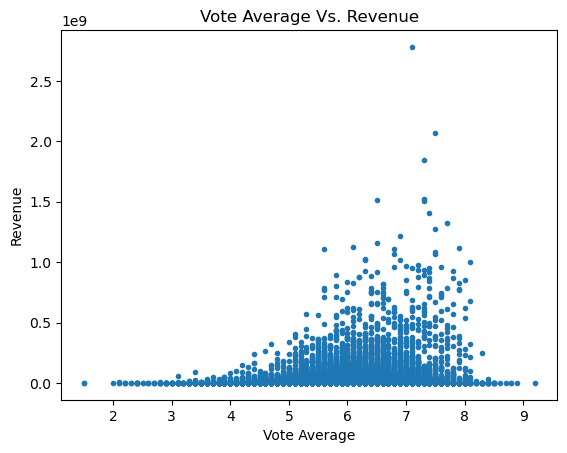

In [7]:
plt.scatter(x=cleaned_df.vote_average, y=cleaned_df.revenue, marker='.', linewidths=1);
plt.xlabel('Vote Average');
plt.ylabel('Revenue');
plt.title('Vote Average Vs. Revenue');

there is a positive correlation between Vote Average and Revenue

# conclusion
<br>> steven spielberg is the director with highest revenue for his total moveies till 2015
<br>> the most produced movies per year was 700 in 2014, and the minimum is 31 in 1961  
<br>> till 2015 avatar had the highest revenue at all with 2781505847
<br>> most produced genres are drama, then comedy, then thriller and action recpecivly
<br>> there is a weake positive correlation between revenue and (runtime, popularity, vote count and vote average)

### limitations:
<br> > there is many zero values in budget and revenue features we replaced it with the median, wich could lead to inaccuracy
<br> > There is no currency unit for budget and revenue features so they may be in different currencies for different countries.